### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 4
### Due: Friday, Sep 22 at 11:59 pm CT

## Problem 1

This one is on correlation coefficients. We want to find the link between the price of a 500 ml bottle of water and the distance from the city center. We might expect to find that the price of a bottle of water decreases as the distance from the city center increases. Higher property rents close to the city center should be reflected in higher prices in the shops.

The hypothesis might be written like this:
"The price of a water bottle decreases as distance from the city center increases."

The more objective scientific research method is always to assume that no such price-distance relationship exists (i.e., there is no correlation) and to express the null hypothesis as:
"There is no significant relationship between the price of a water bottle and distance from the city center."

The data are given in the table below. Compute the Pearson's, Spearman's, and Kendall's correlation coefficients and find the significance level by which the null hypothesis is rejected. Show all your calculation and work using python and Markdown. 

| Distance (m)| price ($) |
|-------- | ------- |
| 50  | 1.80    |
| 175 | 1.20    |
| 270 | 2.00    |
| 375 | 1.50    |
| 425 | 0.80    |
| 580 | 0.60    |
| 710 | 1.05    |
| 790 | 0.85    |
| 890 | 0.90    |
| 980 | 1.00    |
| 1000| 0.95    |

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%config Inline.Backend.figure_format='retina'

In [3]:
distance = [50, 175, 270, 375, 425, 580, 710, 790, 890, 980, 1000]
price = [1.80, 1.2, 2., 1.5, 0.8, 0.6, 1.05, 0.85, 0.9, 1., 0.95]

#Pearson
rho_p = scipy.stats.pearsonr(distance, price)

#Spearman
rho_s = scipy.stats.spearmanr(distance, price)

#Kendall
rho_k = scipy.stats.kendalltau(distance, price)

print("Pearson's coefficient: ", rho_p)
print("Spearman's coefficient: ", rho_s)
print("Kendall's coefficient: ", rho_k)

Pearson's coefficient:  PearsonRResult(statistic=-0.6493719424695604, pvalue=0.030600513361477802)
Spearman's coefficient:  SignificanceResult(statistic=-0.5545454545454546, pvalue=0.07665233333978251)
Kendall's coefficient:  SignificanceResult(statistic=-0.34545454545454546, pvalue=0.16457331248997917)


## Hypothesis testing

In [4]:
#Pearson student t
N = len(distance)
k = N - 2 #deg of freedom
distST = scipy.stats.t(k)

r = rho_p[0]
t_p = r * np.sqrt( (N-2) / (1 - r**2) )

pval_P = distST.cdf(t_p)
print(f'p-value for Pearson: {pval_P}')


#Spearman student t
r_s = rho_s[0]
t_s = r_s * np.sqrt( (N-2) / (1 - r_s**2) )

pval_S = distST.cdf(t_s)
print(f"p-value for Spearman's: {pval_S}")

#Kendall, assuming normal distribution
r_k = rho_k[0] 

mu = 0
sigma = 2*(2*N + 5) / (9*N * (N-1)) 
distN = scipy.stats.norm(mu, sigma)
pval_K = scipy.stats.norm.cdf(r_k)
print(f"p-value for Kendall's: {pval_K}")

p-value for Pearson: 0.0153002566807389
p-value for Spearman's: 0.038326166669891255
p-value for Kendall's: 0.3648763383617408


We will reject the null hypthesis if the p-value <= 0.05

In case of Pearson, the p-value is less than the significance level of 0.05. So in this case, we can reject the null hypothesis and say that there is a correlation between the distance and price. 

In case of Spearman and Kendall, the p-value is greater than the significance level of 0.05. Therefore, we cannot reject the null hypothesis.
This implies there is no correlation between the distance and the price

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

Random draws = [ 84.19986356  81.70380776 116.08160793 113.86383491  80.01622515
 104.61334958 112.67108284 119.74595219 107.02772828 111.03600805]


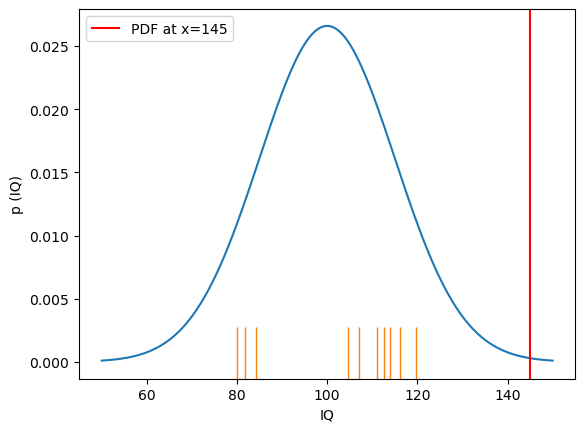

In [5]:
#1
mu = 100
sigma = 15

distN = scipy.stats.norm(mu, sigma)

xgrid = np.linspace(50, 150, 1000)

#Random draws
x = distN.rvs(10)
print(f'Random draws = {x}')

def plott():
    fig, ax = plt.subplots()
    ax.plot(xgrid, distN.pdf(xgrid))
    ax.set_xlabel('IQ')
    ax.set_ylabel('p (IQ)')
    
    
    ax.plot(x, 0*x, '|', markersize=50)
    ax.axvline(145, c='r', label='PDF at x=145')
    plt.legend()

plott()

Text(0, 0.5, 'P (IQ) (cdf)')

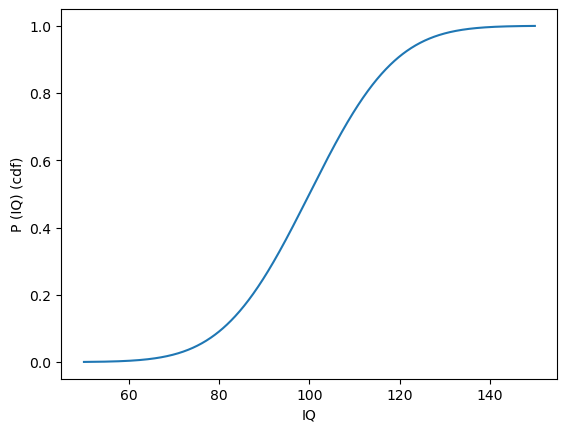

In [6]:
#2 

cdf = distN.cdf(xgrid)

fig1, ax1 = plt.subplots()
ax1.plot(xgrid, cdf, label='CDF')
ax1.set_xlabel('IQ')
ax1.set_ylabel('P (IQ) (cdf)')




[125.59092645  87.78263223 114.22056646 ...  81.47664839 111.49011884
 126.30730363]


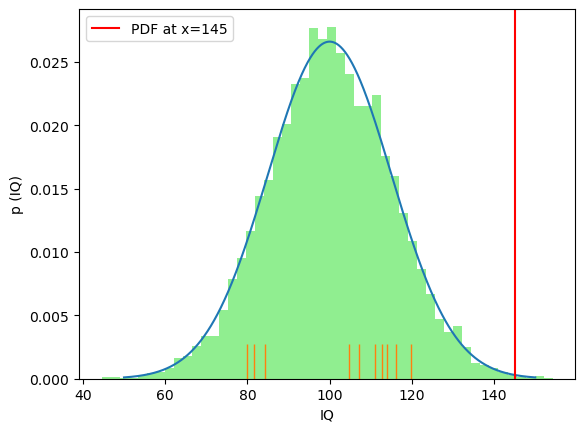

In [7]:
#3
def inv_trasform_sample(N, p, seed):

    std = p.std()
    x_arr = np.linspace(-1000*std, 1000*std, 50000)    
    cdf = p.cdf(x_arr)
    #spl = interp1d(cdf, x_arr)
    
    #Uniform draws
    rng = np.random.default_rng(seed=seed)
    u = rng.uniform(0,1, size=N)

    x = p.ppf(u)
    return x


N=10**4

x_new = inv_trasform_sample(N, distN, seed=10)
print(x_new)

plott();
plt.hist(x_new, 50, color='lightgreen', density=True);

In [8]:
#4 

#Fraction of people with IQ > 145 = 1 - cdf(145)

ans = 1 - distN.cdf(145)
print('The fraction of people with IQ > 145 =', ans)

The fraction of people with IQ > 145 = 0.0013498980316301035


In [21]:
#5

#For one in a million, we need to find the IQ for which p(IQ) = 10^(-6) = 1 - cdf(10^(-6))

ans = distN.ppf(1 - 1e-6)
print(f'The IQ that corresponds to "one in a million" is {np.round(ans,3)}')

The IQ that corresponds to "one in a million" is 171.301
